# **1. Importing the modules**

In [101]:
import numpy as np 
import pandas as pd 
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings

warnings.filterwarnings("ignore")


# **1.1 Reading the dataset**

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# **1.2 Creating DataFrame**

In [6]:
rain = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [7]:
def reload_dataset():
    rain = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
    rain.head(10)
    return rain

# **1.3 Shape of DataFrame**

In [8]:
print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')

The number of rows are 145460 and the number of columns are 23


# **1.4 Describing the attributes**

In [9]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**6 columns are of type 'object' and remaining of 'float'**

# **1.5 Finding all the categorical and continuous values**

In [10]:
categorical_col, contin_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# **1.6 Unique values**

In [11]:
rain.nunique()


Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

# **1.6 Checking Null values**

In [12]:
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# **1.7 Visualizing the missing values**

<AxesSubplot:>

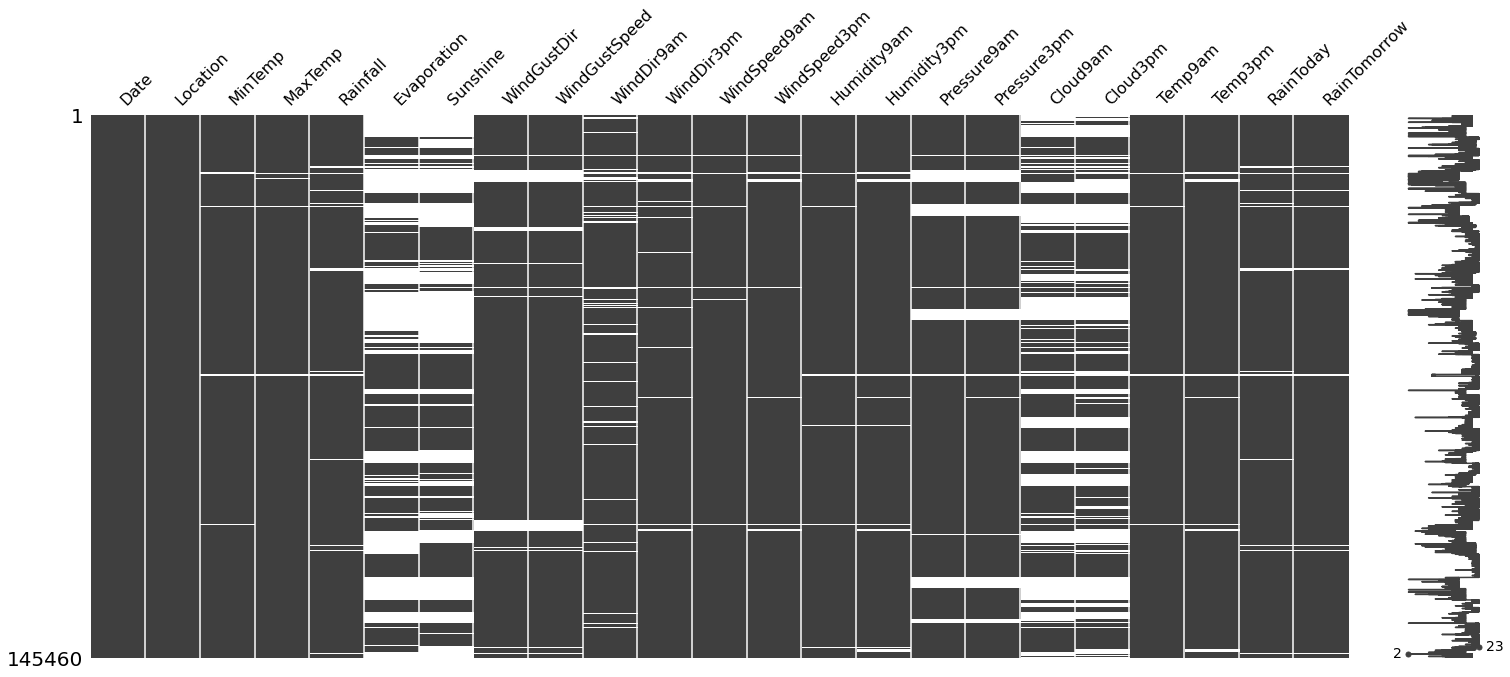

In [13]:
msno.matrix(rain)


<AxesSubplot:>

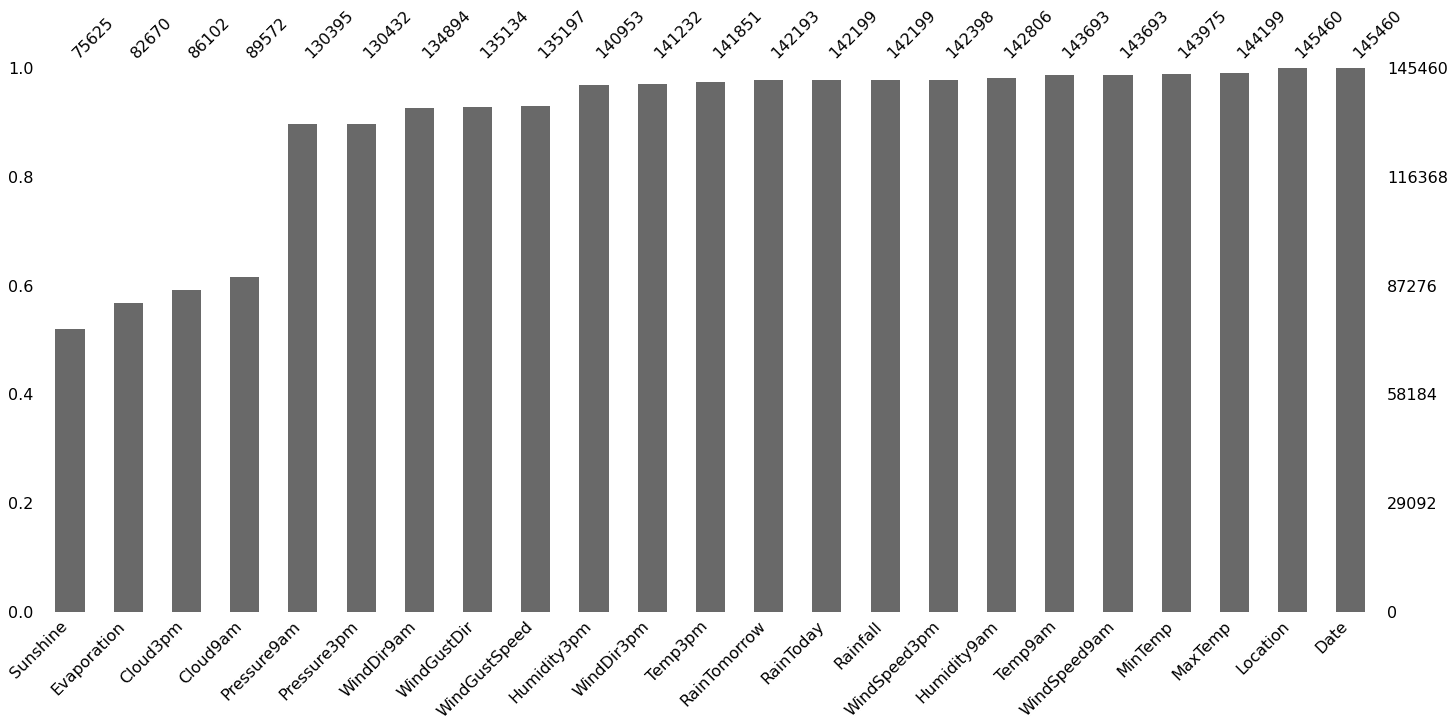

In [14]:
msno.bar(rain, sort='ascending')


<AxesSubplot:>

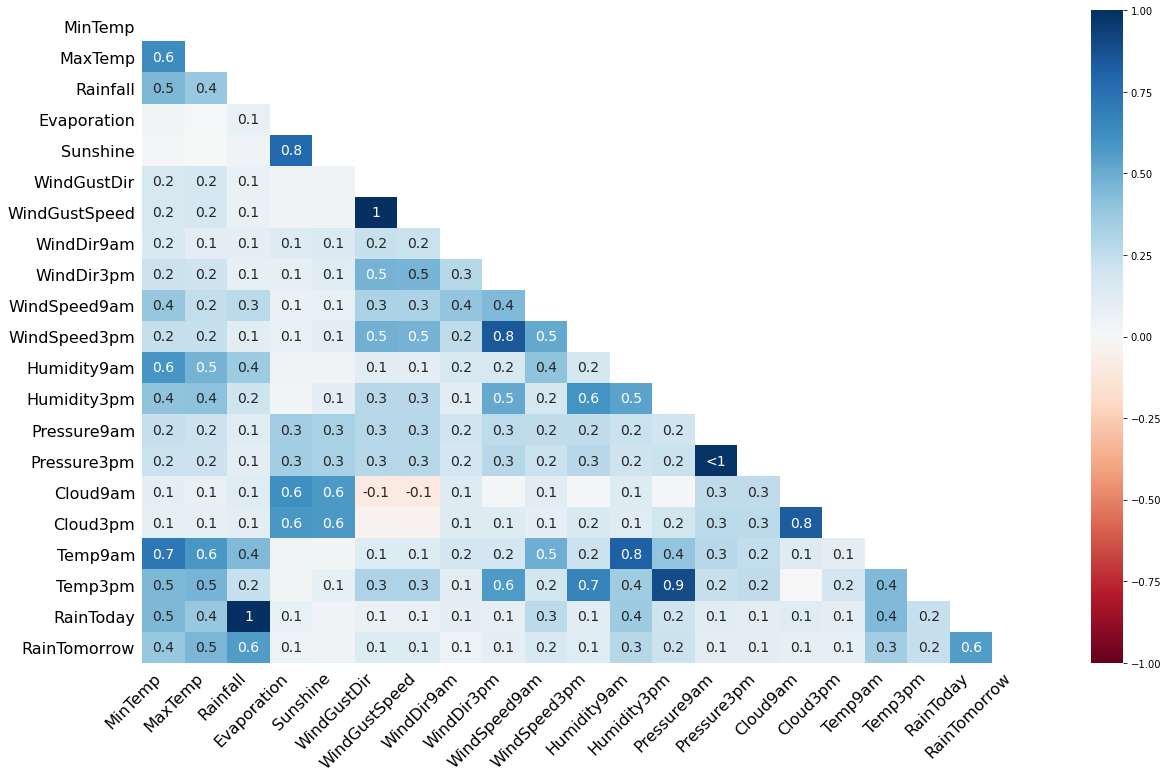

In [15]:
msno.heatmap(rain)


The above graphs show that the number of missing values are high in: Sunshine, Evaporation, Cloud3pm and Cloud9am.

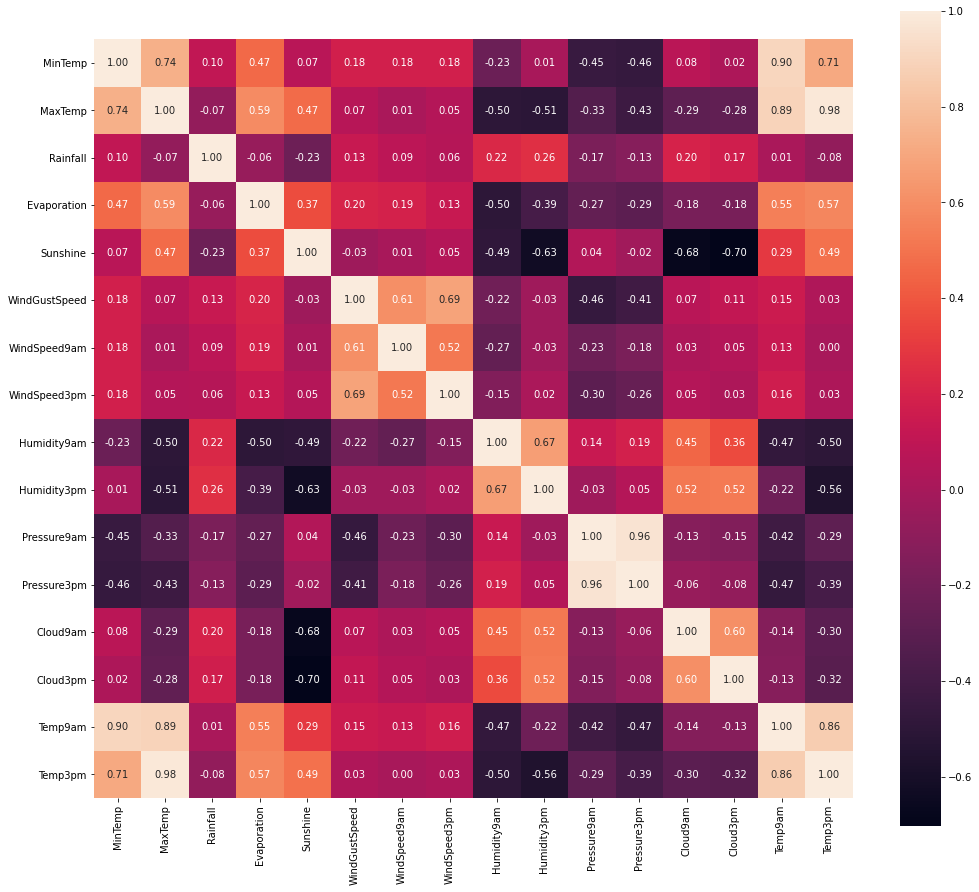

In [16]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(rain.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()



# **1.8 Changing yes and no to 1 and 0 in some columns**

In [17]:
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

print(rain.RainToday)
print(rain.RainTomorrow)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


# **1.9 Dealing with the missing values**

In [18]:
#Checking percentage of missing data in every column

(rain.isnull().sum()/len(rain))*100


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

define function to impute the null values for the numerical rows

In [19]:
def fill_mean(dataset, feature_list):
    output_dataset=dataset.copy()
    for i in feature_list:
        output_dataset[i]=output_dataset[i].fillna(output_dataset[i].mean())
    return output_dataset

In [20]:
rain = reload_dataset()
rain2 = pd.DataFrame()
rain2 = fill_mean(rain,contin_val)

In [21]:
rain2.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [22]:
#Filling the missing values for continuous variables with mean
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [23]:
rain.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [24]:
print(rain.head() == rain2.head())

   Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  True      True     True     True      True         True      True   
1  True      True     True     True      True         True      True   
2  True      True     True     True      True         True      True   
3  True      True     True     True      True         True      True   
4  True      True     True     True      True         True      True   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0         True           True        True  ...         True         True   
1         True           True        True  ...         True         True   
2         True           True        True  ...         True         True   
3         True           True        True  ...         True         True   
4         True           True        True  ...         True         True   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0         True         True   

In [25]:
rain2['MaxTemp'].head()

0    22.9
1    25.1
2    25.7
3    28.0
4    32.3
Name: MaxTemp, dtype: float64

In [26]:
rain['MaxTemp'].head()

0    22.9
1    25.1
2    25.7
3    28.0
4    32.3
Name: MaxTemp, dtype: float64

In [27]:
def fill_mode(dataset, feature_list):
    output_dataset=dataset.copy()
    for i in feature_list:
        if i != 'Location' or i != 'Date': # those two should not be imputed by the mode
            output_dataset[i]=output_dataset[i].fillna(output_dataset[i].mode()[0])
    return output_dataset

In [28]:
rain3 = fill_mode(rain2, categorical_col)

In [29]:
#Filling the missing values for continuous variables with mode

rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])


In [30]:
#Filling the missing values for continuous variables with mode
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [31]:
print(rain.head() == rain3.head())

   Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  True      True     True     True      True         True      True   
1  True      True     True     True      True         True      True   
2  True      True     True     True      True         True      True   
3  True      True     True     True      True         True      True   
4  True      True     True     True      True         True      True   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0         True           True        True  ...         True         True   
1         True           True        True  ...         True         True   
2         True           True        True  ...         True         True   
3         True           True        True  ...         True         True   
4         True           True        True  ...         True         True   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0         True         True   

In [32]:
(rain3.isnull().sum()/len(rain3))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [33]:
#Checking percentage of missing data in every column

(rain.isnull().sum()/len(rain))*100


Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

**All the missing values have been removed now.**

# **2. Data Visualization**

**2.1 Count of rain today and tomorrow**

No     113580
Yes     31880
Name: RainToday, dtype: int64
No     113583
Yes     31877
Name: RainTomorrow, dtype: int64


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

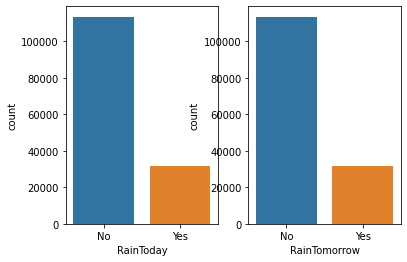

<Figure size 1440x1440 with 0 Axes>

In [34]:
fig, ax =plt.subplots(1,2)
print(rain.RainToday.value_counts())
print(rain.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=rain,x='RainToday',ax=ax[0])
sns.countplot(data=rain,x='RainTomorrow',ax=ax[1])

**2.2 Direction of wind at 9 am, 3 pm.**

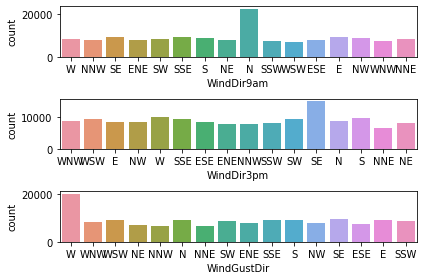

<Figure size 720x720 with 0 Axes>

In [35]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=rain,x='WindDir9am',ax=ax[0])
sns.countplot(data=rain,x='WindDir3pm',ax=ax[1])
sns.countplot(data=rain,x='WindGustDir',ax=ax[2])
fig.tight_layout()


* At 9 am, it is highest for direction N.
* At 3 pm, it is highest for direction SE.


In [36]:
rain3['Date'] = pd.to_datetime(rain3['Date'])
rain3['Year'] = rain3['Date'].dt.year
rain3['Month'] = rain3['Date'].dt.month
rain3['Day'] = rain3['Date'].dt.day
rain4 = rain3.drop('Date', axis=1)
rain4

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,...,1020.3,4.447461,4.50993,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,...,1019.1,4.447461,4.50993,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,...,1016.8,4.447461,4.50993,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,...,1016.5,3.000000,2.00000,15.1,26.0,No,No,2017,6,24


In [37]:
#Dropping date column
rain=rain.iloc[:,1:]
rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


**Encoding the categorical variables**

In [42]:
last_categoricals = []
for i in rain4.columns:
    if rain4[i].dtype == 'object' and i != 'RainToday' and i != 'RainTomorrow':
        last_categoricals.append(i)
print(last_categoricals)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [46]:
def encode_categoricals(dataset, feature_list):
    output_dataset = dataset.copy()
    le = preprocessing.LabelEncoder()
    for i in feature_list:
        output_dataset[i] = le.fit_transform(output_dataset[i])
    return output_dataset

In [47]:
rain5 = encode_categoricals(rain4, last_categoricals)
rain5.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


In [38]:
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])



In [39]:
rain.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


**2.3 HeatMap**

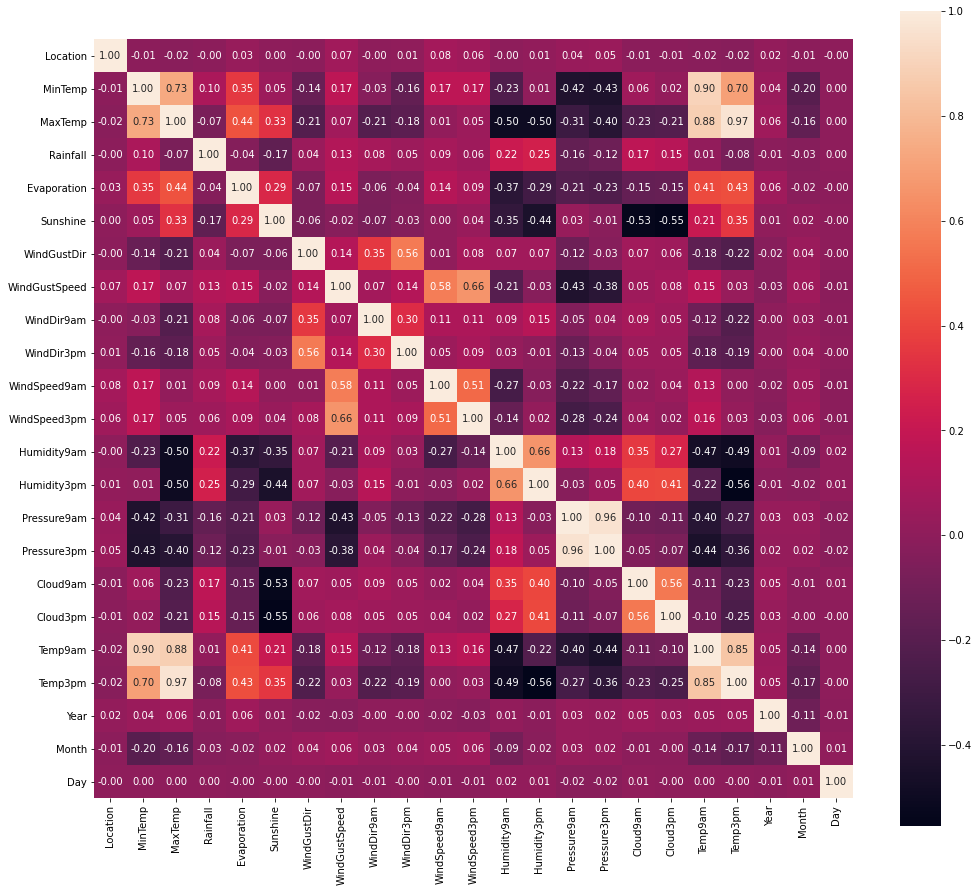

In [49]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(rain5.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()



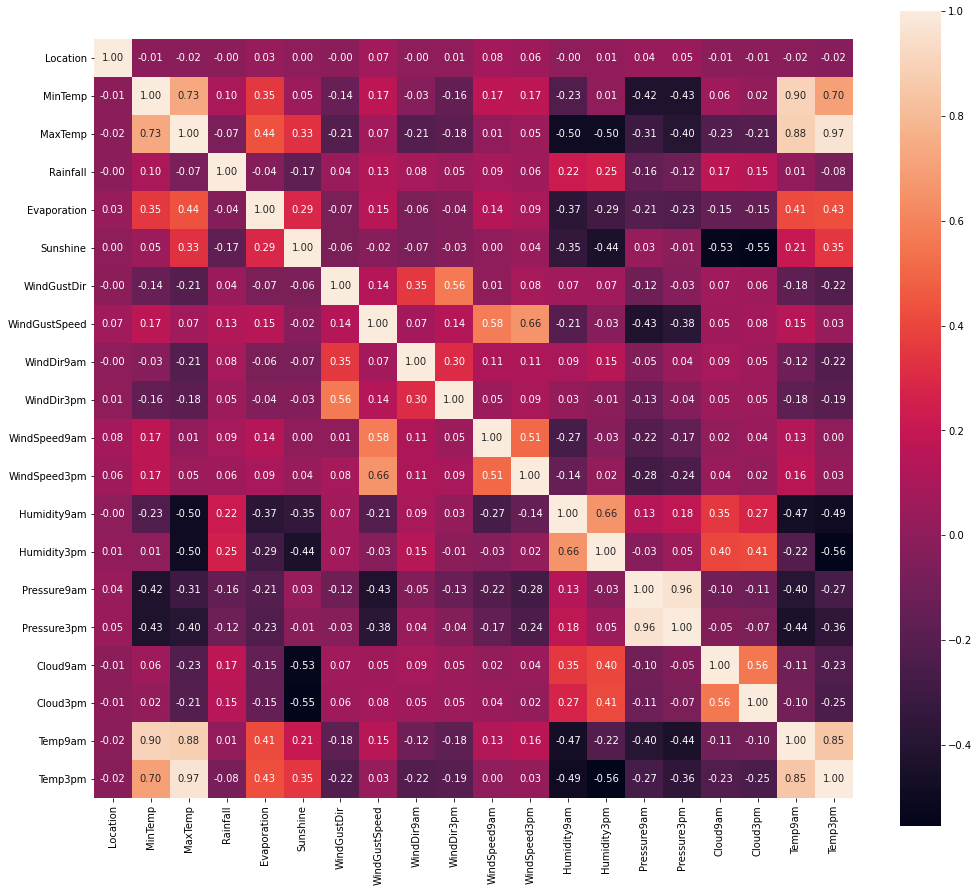

In [48]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(rain.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

*  MinTemp and Temp9am highly correlated.
*  MinTemp and Temp3pm highly correlated.
*  MaxTemp and Temp9am highly correlated.
*  MaxTemp and Temp3pm highly correlated.

*  Temp3pm and Temp9am highly correlated.
*  Humidity9am and Humidity3pm highly correlated.

**2.4 Boxplots**

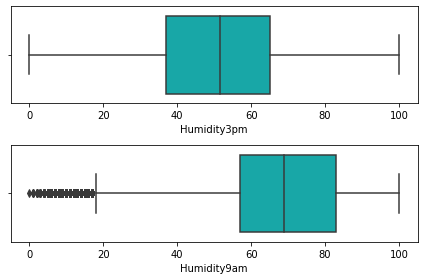

<Figure size 720x720 with 0 Axes>

In [50]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['Humidity3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['Humidity9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()


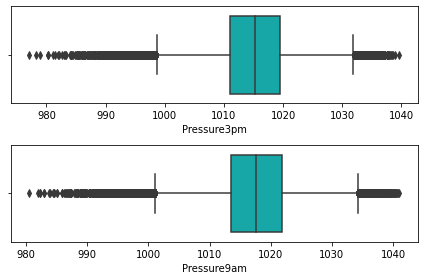

<Figure size 720x720 with 0 Axes>

In [51]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['Pressure3pm'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['Pressure9am'],orient='v',color='c',ax=ax[1])
fig.tight_layout()


****2.5 Bivariate Analysis****

**Violin Plot**

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

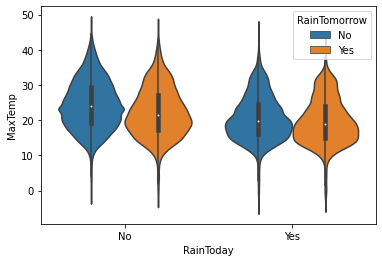

In [52]:

sns.violinplot(x='RainToday',y='MaxTemp',data=rain,hue='RainTomorrow')


<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

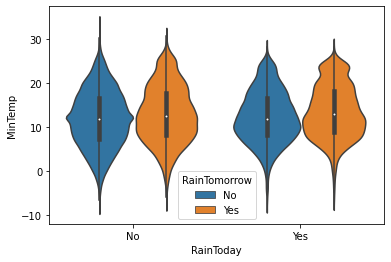

In [53]:
sns.violinplot(x='RainToday',y='MinTemp',data=rain,hue='RainTomorrow')


**2.6 Removing the outliers**

In [57]:
numeric_columns = rain.select_dtypes(include=[np.number]).columns
rain_numeric = rain[numeric_columns]

print('Shape of DataFrame Before Removing Outliers', rain.shape)
rain = rain[(np.abs(stats.zscore(rain_numeric)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape)

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136608, 22)


Here we filter out all values which do lie more than three std away from the columns mean value

In [56]:
numeric_columns = rain5.select_dtypes(include=[np.number]).columns
rain5_numeric = rain5[numeric_columns]

print('Shape of DataFrame Before Removing Outliers', rain5.shape)
rain5_filtered = rain5[(np.abs(stats.zscore(rain5_numeric)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain5_filtered.shape)

Shape of DataFrame Before Removing Outliers (145460, 25)
Shape of DataFrame After Removing Outliers (136608, 25)


**2.7 Dropping highly correlated columns**

columns that could be possibly removed: temp3pm, temp9am, humidity9am also maybe one of mintemp/maxtemp

In [58]:
rain5_filtered.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain5_filtered.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [59]:
rain=rain.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [61]:
rain5_filtered['RainTomorrow'] = rain5_filtered['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain5_filtered['RainToday'] = rain5_filtered['RainToday'].map({'Yes': 1, 'No': 0})

In [62]:
rain5_filtered.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [60]:
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

**2.8 Train test split**

In [66]:
X = rain5_filtered.drop(['RainTomorrow'],axis=1)
y = rain5_filtered['RainTomorrow']

In [69]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,2008,12,5


In [68]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.2, random_state=42)


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [81]:
X_train.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,...,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000,109286.000000
mean,0.495186,0.499903,0.499185,0.053904,0.351690,0.527299,0.537458,0.457279,0.464882,0.516846,...,0.509081,0.508557,0.490903,0.497536,0.496689,0.498606,0.201728,0.577568,0.490118,0.490079
std,0.295562,0.166254,0.161828,0.138166,0.157733,0.185411,0.313238,0.162607,0.301218,0.302705,...,0.158654,0.159399,0.250286,0.231269,0.163804,0.161682,0.401292,0.253920,0.309094,0.292954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.379947,0.377358,0.000000,0.268456,0.524909,0.266667,0.347222,0.200000,0.266667,...,0.409429,0.406015,0.333333,0.444444,0.378238,0.380488,0.000000,0.400000,0.181818,0.233333
50%,0.500000,0.496042,0.488208,0.000000,0.366995,0.524909,0.600000,0.458333,0.466667,0.533333,...,0.499999,0.500148,0.494162,0.501103,0.492228,0.490244,0.000000,0.600000,0.454545,0.500000
75%,0.750000,0.620053,0.613208,0.029197,0.366995,0.600000,0.866667,0.555556,0.733333,0.800000,...,0.607940,0.609023,0.666667,0.666667,0.611399,0.607317,0.000000,0.800000,0.727273,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**2.9 Balancing the data using SMOTE**

Here's what SMOTE does to an imbalanced dataset:

1. Introduction of Synthetic Samples:
SMOTE generates synthetic examples for the minority class by creating synthetic instances that are similar to, but not identical to, existing minority class instances.
It does this by selecting a minority class instance and its k nearest neighbors. Synthetic instances are then generated along the line segments connecting these neighbors.
2. Balancing the Class Distribution:
By creating synthetic samples, SMOTE aims to balance the class distribution in the dataset, ensuring that both the majority and minority classes have a more equal representation.
This can be crucial for improving the performance of machine learning models, especially those sensitive to class imbalance.
3. Reducing Bias in Model Training:
Imbalanced datasets can lead machine learning models to be biased towards the majority class, resulting in poor performance on the minority class. SMOTE helps in mitigating this bias by providing more examples of the minority class.
4. Impact on Decision Boundaries:
The introduction of synthetic samples can impact the decision boundaries of the model. It tends to make decision boundaries smoother and more generalizable, potentially improving the model's ability to generalize to unseen data.
5. Potential Downsides:
While SMOTE can be effective, it's important to note that it might not always improve the performance of a model, and its effectiveness can depend on the specific characteristics of the dataset and the machine learning algorithm used.
In some cases, oversampling minority instances excessively may lead to overfitting, especially if the synthetic instances are not representative of the underlying distribution.
In summary, SMOTE is a valuable technique for addressing imbalanced datasets by creating synthetic samples for the minority class. It is widely used to improve the performance of machine learning models, particularly in scenarios where the imbalance between classes is significant. However, as with any technique, its application should be carefully considered based on the characteristics of the dataset and the goals of the modeling task.

In [82]:
os = SMOTE()
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({0: 86830, 1: 86830})


In [83]:
os = SMOTE()
X_train, Y_train = os.fit_resample(X_train, Y_train)
count = Counter(Y_train)
print(count)

Counter({0: 86830, 1: 86830})


Some other methods are:

1. Random Under-sampling:
This involves randomly removing instances from the majority class to balance the class distribution. While it can help balance the classes, it may discard potentially valuable information.
2. Random Over-sampling:
This involves randomly duplicating instances from the minority class to balance the class distribution. It may lead to overfitting, especially when the dataset is small.
3. Under-sampling Specific Instances:
Instead of randomly under-sampling the majority class, you can selectively under-sample instances from the majority class that are close to the minority class instances.
4. Over-sampling with Replacement:
This involves over-sampling the minority class by randomly duplicating instances with replacement. This can lead to overfitting but might be useful when you have a small dataset.
5. SMOTE Variants:
There are variations of SMOTE, such as Borderline-SMOTE and ADASYN, that focus on generating synthetic samples near the decision boundary to improve generalization.
6. Ensemble Methods:
Ensemble methods like Random Forest and AdaBoost can be effective with imbalanced datasets. They combine multiple models to make predictions, and their inherent diversity can help handle imbalanced classes.
7. Cost-sensitive Learning:
You can assign different misclassification costs to different classes during model training. This way, the model is encouraged to focus more on correctly classifying instances from the minority class.
8. Using Different Algorithms:
Some algorithms are inherently more robust to class imbalance. For example, Support Vector Machines (SVM) and Decision Trees may perform better on imbalanced datasets.
9. Modified Algorithms:
Some machine learning algorithms have variations or modifications designed to handle imbalanced datasets. For instance, XGBoost has a parameter (scale_pos_weight) that can be adjusted to handle class imbalance.
10. Anomaly Detection Techniques:
If the minority class represents anomalies or rare events, anomaly detection techniques, such as one-class SVM or isolation forests, might be suitable.
11. Data Augmentation:
Generate additional training samples by applying transformations (e.g., rotation, flipping, cropping) to the existing instances in the minority class.
12. Using Evaluation Metrics:
Choose appropriate evaluation metrics that are sensitive to the minority class, such as precision, recall, F1 score, or area under the precision-recall curve.


# **3. Training The Models**

**3.1 Logistic Regression**

In [84]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
predicted=model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(y_test, predicted,)*100, "%")


The accuracy of Logistic Regression is :  77.3735451284679 %

F1 score for logistic regression is : 58.08813559322034 %


In [85]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted=model.predict(X_test)

conf = confusion_matrix(Y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(Y_test, predicted,)*100, "%")


The accuracy of Logistic Regression is :  78.11653612473465 %

F1 score for logistic regression is : 59.16820323704158 %


**3.2 XGBoost**

In [86]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(x_train,y_train)
predicted = xgbc.predict(x_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")


[18:38:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of Logistic Regression is :  85.98199253348949 %

F1 score for XGBoost is : 61.406690850463534 %


In [87]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,Y_train)
predicted = xgbc.predict(X_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(Y_test, predicted,)*100, "%")

[18:38:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of Logistic Regression is :  86.08081399604714 %

F1 score for XGBoost is : 61.63623524664581 %


**3.3 Gaussian Naive Bayes**

In [88]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")


The accuracy of Gaussian Naive Bayes model is :  76.55735304882512 %

F1 score for Gaussian Naive Bayes is : 55.79405065912071 %


In [89]:
model = GaussianNB()
model.fit(X_train, Y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  75.84364248590879 %

F1 score for Gaussian Naive Bayes is : 55.089820359281426 %


**3.4 Bernoulli Naive Bayes**

In [90]:
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Bernoulli Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  69.59959007393309 %

F1 score for Bernoulli Naive Bayes is : 45.605762933857235 %


In [91]:
model = BernoulliNB()
model.fit(X_train, Y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for Bernoulli Naive Bayes is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  70.81106800380645 %

F1 score for Bernoulli Naive Bayes is : 45.305534599821684 %


**3.5 RandomForest**

In [92]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  84.7119537369153 %


In [93]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(X_train, Y_train)  
predicted = model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(Y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  84.76685454944733 %


create a voting classifier ensemble from the previous models

In [102]:
estimator = []
estimator.append(('LR',LogisticRegression(max_iter=500)))
estimator.append(('XGB',XGBClassifier(objective='binary:logistic')))
estimator.append(('GNB',GaussianNB()))
estimator.append(('BNB',BernoulliNB()))
estimator.append(('RF',RandomForestClassifier(n_estimators = 100, random_state = 0)))
estimator.append(('SVC', SVC(gamma='auto', probability=True)))
estimator.append(('DTC', DecisionTreeClassifier())) 

In [ ]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, Y_train) 
Y_pred = hard_voting.predict(X_test) 

[18:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# accuracy_score metric to predict Accuracy 
print("Hard Voting accuracy Score % d" % accuracy_score(Y_test, Y_pred)*100, '%') 
print("F1 score for Voting Classifier is :",f1_score(Y_test, Y_pred,)*100, "%")